For this project, I first tried using AI, and then switched to modifying the code of another person. The original code can be found at the following URL: https://www.kaggle.com/code/vijayaadithyanvg/car-price-prediction-used-cars

## 🚨🚨 PLEASE DO NOT RUN THIS PROGRAM UNLESS YOU HAVE A MINIMUM OF 32GB OF RAM 🚨🚨
### Any less and your system may crash!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "cars.csv"

# Load the latest version
download = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "abdulrahmankhaled1/1983-2020-used-cars",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

download.to_csv('original_cars.csv')

c:\Users\yalts\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\yalts\AppData\Local\Temp\ipykernel_19536\2614026481.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  download = kagglehub.load_dataset(


100%|██████████| 0.99M/0.99M [00:00<00:00, 9.35MB/s]


In [32]:
car_df = pd.read_csv('cars.csv')

# Extract brand from name column
car_df.insert(0, "make", car_df['name'].apply(lambda x: x.split()[0]))
car_df.insert(1, "model", car_df['name'].apply(lambda x: " ".join(x.split()[1:])))
car_df = car_df.drop(columns='name', axis=1)
car_df['selling_price'] = car_df['selling_price'].multiply(0.012)
make = car_df['make'].unique()
make_dict = {}
for i in range(len(make)):
    make_dict[make[i]] = i
print(make_dict)
car_df['make'] = car_df['make'].map(make_dict)
car_df.sort_values(by='selling_price', ascending=False)

{'Maruti': 0, 'Skoda': 1, 'Honda': 2, 'Hyundai': 3, 'Toyota': 4, 'Ford': 5, 'Renault': 6, 'Mahindra': 7, 'Tata': 8, 'Chevrolet': 9, 'Fiat': 10, 'Datsun': 11, 'Jeep': 12, 'Mercedes-Benz': 13, 'Mitsubishi': 14, 'Audi': 15, 'Volkswagen': 16, 'BMW': 17, 'Nissan': 18, 'Lexus': 19, 'Jaguar': 20, 'Land': 21, 'MG': 22, 'Volvo': 23, 'Daewoo': 24, 'Kia': 25, 'Force': 26, 'Ambassador': 27, 'Ashok': 28, 'Isuzu': 29, 'Opel': 30, 'Peugeot': 31}


,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,23,XC90 T8 Excellence BSIV,2017,120000.000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.00,640Nm@ 1740rpm,4.0
2938,17,X7 xDrive 30d DPE,2020,86400.000,5000,Diesel,Individual,Automatic,First Owner,13.38,2993.0,265.00,620Nm@ 1500-2500rpm,7.0
4952,15,A6 35 TFSI Matrix,2019,78276.000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,320Nm@ 1400-4100rpm,5.0
4950,15,A6 35 TFSI Matrix,2019,74676.000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,320Nm@ 1400-4100rpm,5.0
136,13,S-Class S 350 CDI,2017,72000.000,37000,Diesel,Dealer,Automatic,First Owner,13.5,2987.0,254.79,620Nm@ 1600-2400rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,0,800 Std,2004,378.048,110000,Petrol,Individual,Manual,Third Owner,16.1,796.0,37.00,59Nm@ 2500rpm,4.0
5965,0,800 Std,2000,372.000,56194,Petrol,Individual,Manual,Fourth & Above Owner,16.1,796.0,37.00,59Nm@ 2500rpm,4.0
2145,0,Zen LXI,2001,360.000,10000,Petrol,Individual,Manual,First Owner,17.3,993.0,60.00,78Nm@ 4500rpm,5.0
6776,3,Santro GLS I - Euro I,2000,360.000,90000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN


In [33]:
car_df.shape
#rows, then columns

(8128, 14)

In [34]:
car_df.isnull().sum()

make               0
model              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
dtype: int64

For this analysis, I don't really care about the columns with missing data, so I don't need to drop those records.

In [35]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8128 non-null   int64  
 1   model          8128 non-null   object 
 2   year           8128 non-null   int64  
 3   selling_price  8128 non-null   float64
 4   km_driven      8128 non-null   int64  
 5   fuel           8128 non-null   object 
 6   seller_type    8128 non-null   object 
 7   transmission   8128 non-null   object 
 8   owner          8128 non-null   object 
 9   mileage        7907 non-null   object 
 10  engine         7907 non-null   float64
 11  max_power      7912 non-null   float64
 12  torque         7906 non-null   object 
 13  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 889.1+ KB


In [36]:
print(car_df.selling_price.value_counts())

selling_price
3600.0     227
7200.0     213
4200.0     209
6600.0     204
5400.0     195
          ... 
3696.0       1
46800.0      1
34200.0      1
468.0        1
8952.0       1
Name: count, Length: 677, dtype: int64


In [37]:
categories = ['make',
            'fuel',
            'seller_type',
            'transmission',
            'owner'
            ]
for category in categories:
    category_dict = {}
    c = car_df[category].unique()
    print(f"Number of unique values in {category}: {len(c)}")
    for i in range(len(c)):
        category_dict[c[i]] = i
    car_df[category] = car_df[category].map(category_dict)
car_df.sort_values(by='selling_price', ascending=False)

Number of unique values in make: 32
Number of unique values in fuel: 4
Number of unique values in seller_type: 3
Number of unique values in transmission: 2
Number of unique values in owner: 5


,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,23,XC90 T8 Excellence BSIV,2017,120000.000,30000,1,0,1,0,42.0,1969.0,400.00,640Nm@ 1740rpm,4.0
2938,17,X7 xDrive 30d DPE,2020,86400.000,5000,0,0,1,0,13.38,2993.0,265.00,620Nm@ 1500-2500rpm,7.0
4952,15,A6 35 TFSI Matrix,2019,78276.000,23600,1,1,1,4,15.26,1798.0,187.74,320Nm@ 1400-4100rpm,5.0
4950,15,A6 35 TFSI Matrix,2019,74676.000,7800,1,1,1,4,15.26,1798.0,187.74,320Nm@ 1400-4100rpm,5.0
136,13,S-Class S 350 CDI,2017,72000.000,37000,0,1,1,0,13.5,2987.0,254.79,620Nm@ 1600-2400rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,0,800 Std,2004,378.048,110000,1,0,0,2,16.1,796.0,37.00,59Nm@ 2500rpm,4.0
5965,0,800 Std,2000,372.000,56194,1,0,0,3,16.1,796.0,37.00,59Nm@ 2500rpm,4.0
2145,0,Zen LXI,2001,360.000,10000,1,0,0,0,17.3,993.0,60.00,78Nm@ 4500rpm,5.0
6776,3,Santro GLS I - Euro I,2000,360.000,90000,1,0,0,2,NaN,NaN,NaN,NaN,NaN


In [38]:
z_scores = np.abs(stats.zscore(car_df['selling_price'])) # Get rid of outliers to normalize data
car_df = car_df[(z_scores < 3)]
car_df = car_df.dropna()
car_df = car_df.reset_index(drop=True)

In [48]:
y = car_df['selling_price']


"""
Inclusion of features, by feature:
'make', included
'year', included
'selling_price', included
'km_driven', included
'fuel', included
'seller_type', included
'transmission', included
'owner', included
'mileage', removed, uncleanable as units as different for different fuel types
           and completely incomparable for the purposes of data analysis
'engine', included, cleaned
'max_power', included, cleaned
'torque', removed, uncleanable in a reasonable period of time
'seats' included
]"""


#torque cannot be cleaned, removing from dataset

features = ['make',
            'year',
            'km_driven',
            'fuel',
            'seller_type',
            'transmission',
            'owner',
            'engine',
            'max_power',
            'seats']

X = car_df[features]

X.dropna()

print(features)

print(X.shape)

X

['make', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'engine', 'max_power', 'seats']
(7677, 10)


,make,year,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,0,2014,145500,0,0,0,0,1248.0,74.00,5.0
1,1,2014,120000,0,0,0,1,1498.0,103.52,5.0
2,2,2006,140000,1,0,0,2,1497.0,78.00,5.0
3,3,2010,127000,0,0,0,0,1396.0,90.00,5.0
4,0,2007,120000,1,0,0,0,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
7672,3,2013,110000,1,0,0,0,1197.0,82.85,5.0
7673,3,2007,119000,0,0,0,3,1493.0,110.00,5.0
7674,0,2009,120000,0,0,0,0,1248.0,73.90,5.0
7675,8,2013,25000,0,0,0,0,1396.0,70.00,5.0


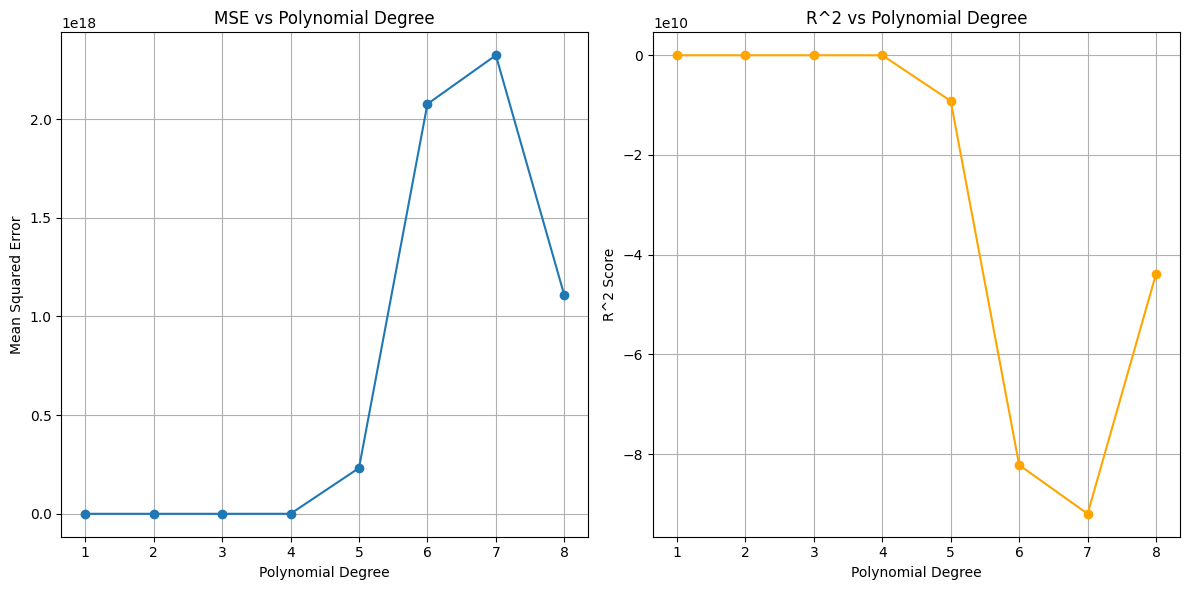

Best degree based on MSE: 3
Best degree based on R^2: 3


In [49]:
# Evaluate polynomial regression for degrees 1 through 8
degrees = range(1, 9)
mse_list = []
r2_list = []

for degree in degrees:
    # Transform features with PolynomialFeatures #iterates on power of the features (squared? cubed?)
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_transform = poly.fit_transform(X)
    
    # Apply StandardScaler for feature scaling #Scales data so that it is on a similar scale
    scaler = StandardScaler()
    X_transform = scaler.fit_transform(X_transform)
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42) #Supervised learning for validating the model's performance
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_test_actual = y_test
    y_pred_actual = y_pred
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred_actual)
    r2 = r2_score(y_test, y_pred_actual)
    mse_list.append(mse)
    r2_list.append(r2)

# Plot MSE and R^2 for each degree
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_list, marker='o', label='MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.grid(True)

# Plot R^2
plt.subplot(1, 2, 2)
plt.plot(degrees, r2_list, marker='o', label='R^2', color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score')
plt.title('R^2 vs Polynomial Degree')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the best degree based on MSE and R^2
best_degree_mse = degrees[np.argmin(mse_list)]
best_degree_r2 = degrees[np.argmax(r2_list)]
print(f"Best degree based on MSE: {best_degree_mse}")
print(f"Best degree based on R^2: {best_degree_r2}")

# Train the final model with the best degree
best_degree = best_degree_r2  # or best_degree_mse based on your preference


Final Model MSE: 2312408.462621505
Final Model R^2: 0.9084226252615687


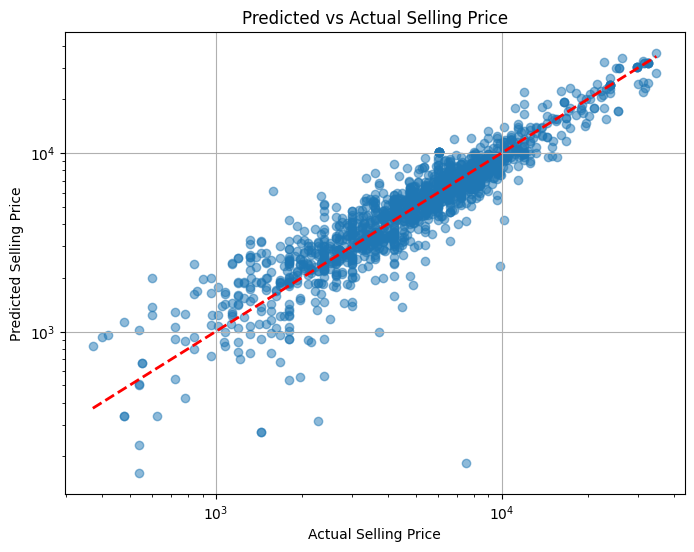

In [52]:
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_transform = poly.fit_transform(X)
X_transform = scaler.fit_transform(X_transform)
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)
#Apparently 42 is convention literally just because of Hitchhiker's Guide to the Galaxy, and I find that hilarious
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Final Model MSE: {mse}")
print(f"Final Model R^2: {r2}")

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Predicted vs Actual Selling Price')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()